This study aims to identify the key factors that influence graduates' decisions to pursue an MBA. By analyzing variables such as annual salary before MBA, years of work experience, undergraduate GPA, GRE/GMAT scores, management experience, expected post-MBA salary, MBA funding source, and reason for pursuing an MBA, this research seeks to uncover patterns and correlations that drive MBA enrollment decisions.

The findings will provide educational institutions, policymakers, and prospective students with valuable insights into the most influential factors, helping them make informed decisions regarding program affordability, career advancement expectations, and return on investment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mba_decision_dataset.csv")
df.head(5)

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [3]:
df.columns

Index(['Person ID', 'Age', 'Gender', 'Undergraduate Major',
       'Undergraduate GPA', 'Years of Work Experience', 'Current Job Title',
       'Annual Salary (Before MBA)', 'Has Management Experience',
       'GRE/GMAT Score', 'Undergrad University Ranking',
       'Entrepreneurial Interest', 'Networking Importance',
       'MBA Funding Source', 'Desired Post-MBA Role',
       'Expected Post-MBA Salary', 'Location Preference (Post-MBA)',
       'Reason for MBA', 'Online vs. On-Campus MBA', 'Decided to Pursue MBA?'],
      dtype='object')

In [4]:
df.shape

(10000, 20)

In [5]:
df.isna().sum()

Person ID                         0
Age                               0
Gender                            0
Undergraduate Major               0
Undergraduate GPA                 0
Years of Work Experience          0
Current Job Title                 0
Annual Salary (Before MBA)        0
Has Management Experience         0
GRE/GMAT Score                    0
Undergrad University Ranking      0
Entrepreneurial Interest          0
Networking Importance             0
MBA Funding Source                0
Desired Post-MBA Role             0
Expected Post-MBA Salary          0
Location Preference (Post-MBA)    0
Reason for MBA                    0
Online vs. On-Campus MBA          0
Decided to Pursue MBA?            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Person ID                       10000 non-null  int64  
 1   Age                             10000 non-null  int64  
 2   Gender                          10000 non-null  object 
 3   Undergraduate Major             10000 non-null  object 
 4   Undergraduate GPA               10000 non-null  float64
 5   Years of Work Experience        10000 non-null  int64  
 6   Current Job Title               10000 non-null  object 
 7   Annual Salary (Before MBA)      10000 non-null  int64  
 8   Has Management Experience       10000 non-null  object 
 9   GRE/GMAT Score                  10000 non-null  int64  
 10  Undergrad University Ranking    10000 non-null  int64  
 11  Entrepreneurial Interest        10000 non-null  float64
 12  Networking Importance           1

In [7]:
df['Person ID']=df['Person ID'].astype(object)

In [8]:
df['Gender'] = df['Gender'].astype('category')
df['MBA Funding Source'] = df['MBA Funding Source'].astype('category')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Person ID                       10000 non-null  object  
 1   Age                             10000 non-null  int64   
 2   Gender                          10000 non-null  category
 3   Undergraduate Major             10000 non-null  object  
 4   Undergraduate GPA               10000 non-null  float64 
 5   Years of Work Experience        10000 non-null  int64   
 6   Current Job Title               10000 non-null  object  
 7   Annual Salary (Before MBA)      10000 non-null  int64   
 8   Has Management Experience       10000 non-null  object  
 9   GRE/GMAT Score                  10000 non-null  int64   
 10  Undergrad University Ranking    10000 non-null  int64   
 11  Entrepreneurial Interest        10000 non-null  float64 
 12  Networking Importan

In [10]:
df['Person ID'].duplicated().sum()

np.int64(0)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,Age,Undergraduate GPA,Years of Work Experience,Annual Salary (Before MBA),GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,Expected Post-MBA Salary
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,27.494300,2.991611,4.53350,75166.406400,524.44690,247.03620,5.477830,5.522170,130321.228900
std,4.031823,0.573509,2.86166,25850.070599,158.06376,144.87624,2.585864,2.588422,40598.421993
min,21.000000,2.000000,0.00000,30013.000000,250.00000,1.00000,1.000000,1.000000,60001.000000
25%,24.000000,2.490000,2.00000,52862.000000,390.00000,121.00000,3.200000,3.300000,95320.500000
50%,27.000000,2.990000,5.00000,74829.500000,524.00000,243.00000,5.500000,5.500000,130155.500000
75%,31.000000,3.480000,7.00000,97273.000000,661.00000,373.00000,7.700000,7.700000,165757.000000
max,34.000000,4.000000,9.00000,119966.000000,799.00000,499.00000,10.000000,10.000000,199999.000000


In [13]:
df['Age'].unique()

array([27, 24, 33, 31, 28, 25, 30, 23, 26, 22, 32, 34, 21, 29])

In [14]:
df.head(5)

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


**EXPLORATORY DATA ANALYSIS**

AGE

In [15]:
bins = [20, 25, 30, 35, 100]  # 100 as upper bound for any age above 35
labels = ['20-24', '25-29', '30-34', '35+']

# Create Age Group column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


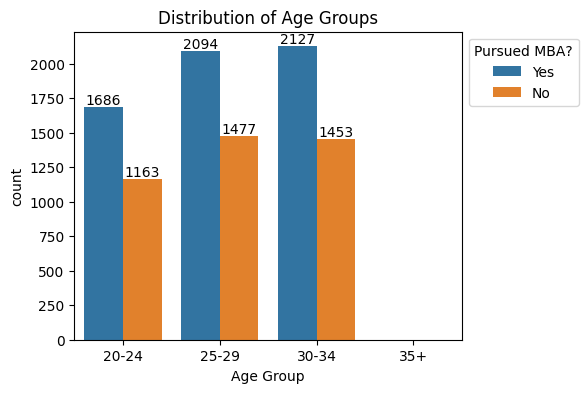

In [16]:
plt.figure(figsize=(5, 4))
ax=sns.countplot(x='Age Group', data=df,hue='Decided to Pursue MBA?' ,order=labels)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Distribution of Age Groups")
plt.legend(title="Pursued MBA?", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

large number of individuals in 30 to 35 age group persue an MBA after that the individuals from 25 to 29 age group decide to persue an MBA  

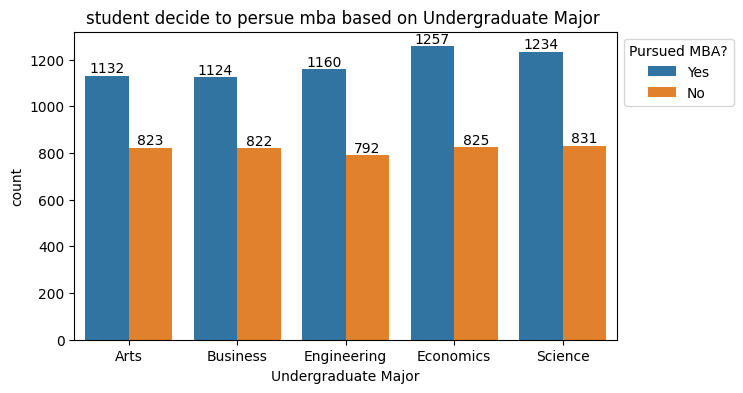

In [17]:
plt.figure(figsize=(7,4))
ax=sns.countplot(x='Undergraduate Major',data=df,hue="Decided to Pursue MBA?")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('student decide to persue mba based on Undergraduate Major ')
plt.xlabel('Undergraduate Major')
plt.legend(title="Pursued MBA?", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

Economics and Science majors exhibit the highest number of students going for an MBA.  While Engineering also shows a substantial interest, it's less than Economics and Science.

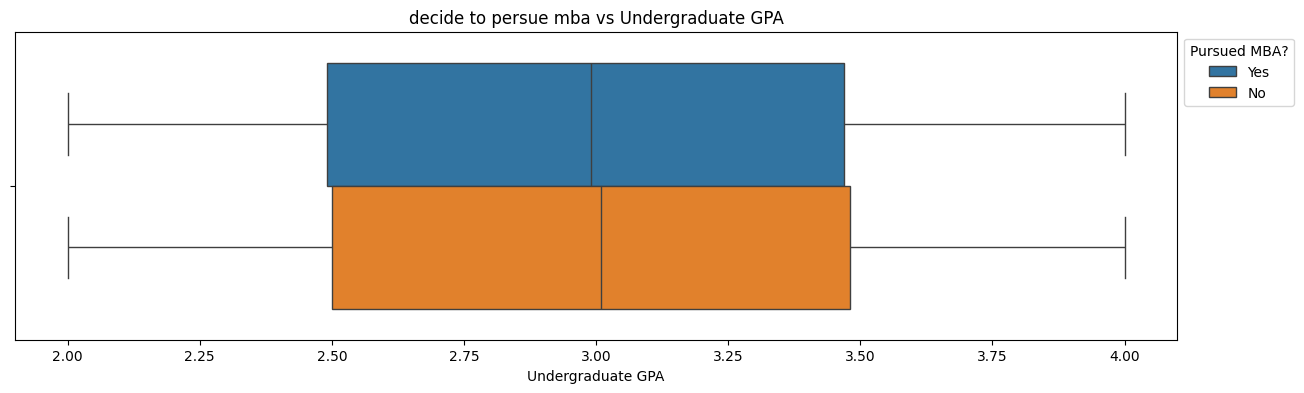

In [18]:
plt.figure(figsize=(15,4))
sns.boxplot(x='Undergraduate GPA',data=df,hue="Decided to Pursue MBA?")
plt.title('decide to persue mba vs Undergraduate GPA')
plt.xlabel('Undergraduate GPA')
plt.legend(title="Pursued MBA?", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

The orange line inside each box represents the median GPA for that group.  Visually, the median GPA for those who decided not to pursue an MBA appears slightly lower than the median GPA for those who did decide to pursue an MBA.  This suggests a tendency for individuals with higher undergraduate GPAs to be more inclined towards MBA programs. 

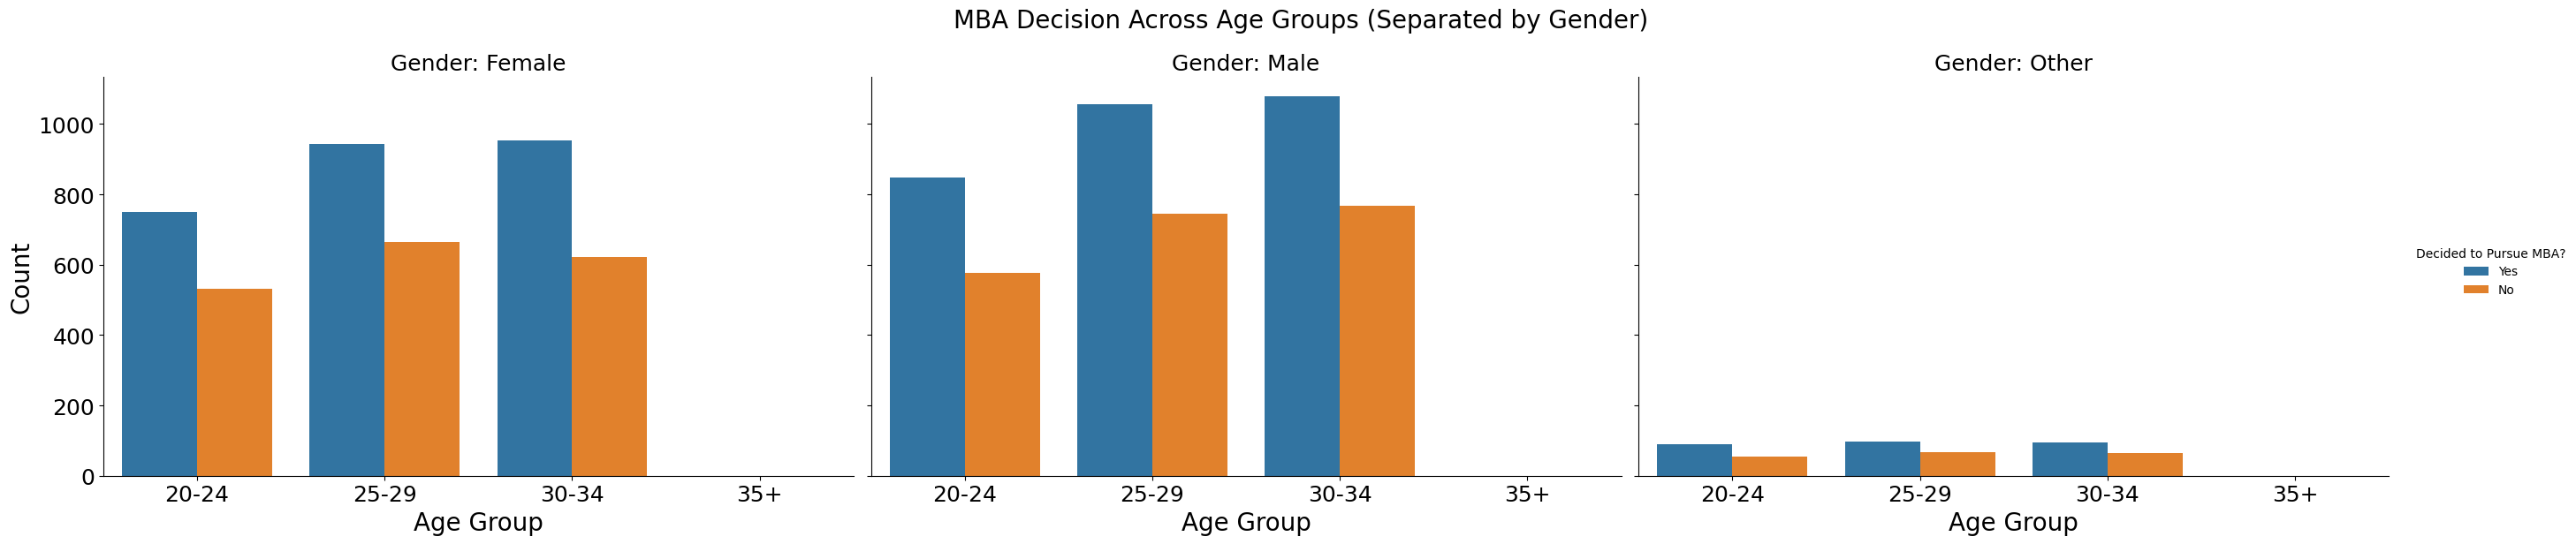

In [19]:
# Create a facet grid for Gender
g = sns.catplot(
    x="Age Group",
    hue="Decided to Pursue MBA?",
    col="Gender",
    data=df,
    kind="count",
    order=['20-24', '25-29', '30-34', '35+'],
    height=6,
    aspect=1.5
)
# Adjust the labels and title
g.set_axis_labels("Age Group", "Count", fontsize=20)  # Increase font size of axis labels
g.set_titles("Gender: {col_name}", fontsize=30)  # Increase font size of titles
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("MBA Decision Across Age Groups (Separated by Gender)", fontsize=20)  # Increase font size of the main title

# Increase font size of ticks
for ax in g.axes.flat:
    ax.tick_params(axis='both', labelsize=18)  # Increase font size of ticks
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=18)  # Increase the font size of subplot titles

plt.show()

the graph highlights the concentration of MBA interest within the 25-34 age group for both males and females, with males having a higher overall count.

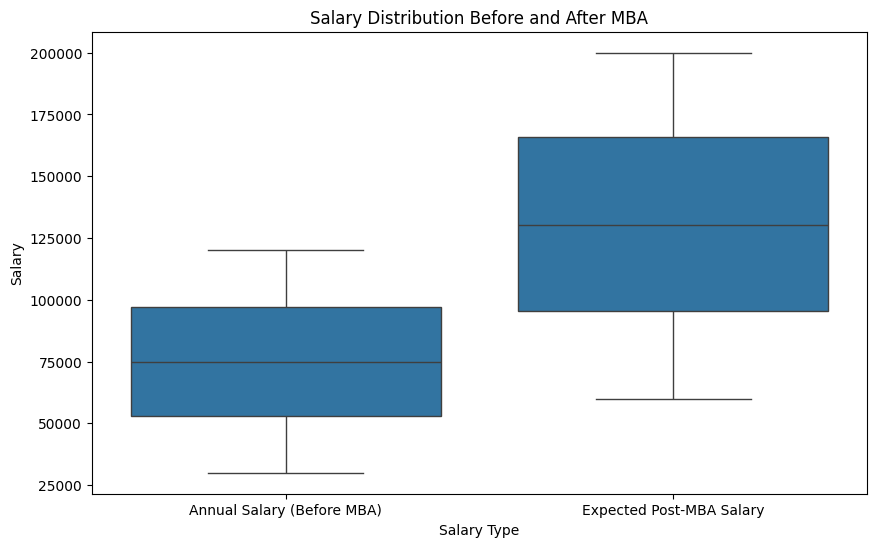

In [20]:
# Reshape the data for plotting
df_melted = df[['Annual Salary (Before MBA)', 'Expected Post-MBA Salary']].melt(var_name='Salary Type', value_name='Salary')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary Type', y='Salary', data=df_melted)
plt.title('Salary Distribution Before and After MBA')
plt.show()

 the box plot strongly suggests that individuals expect a significant increase and a wider range of potential salaries after completing an MBA.

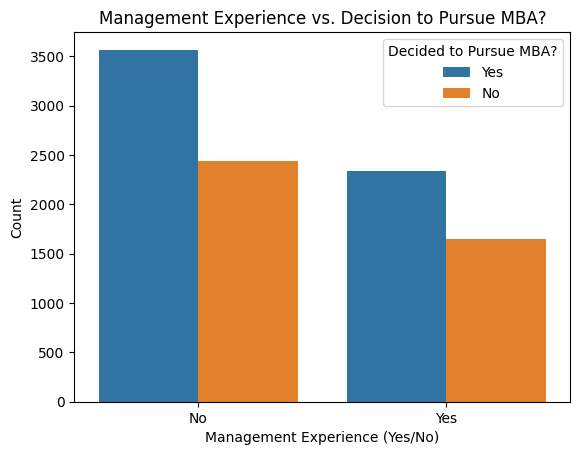

In [21]:
sns.countplot(data=df, x='Has Management Experience', hue='Decided to Pursue MBA?')
plt.title('Management Experience vs. Decision to Pursue MBA?')
plt.xlabel('Management Experience (Yes/No)')
plt.ylabel('Count')
plt.show()

A higher proportion of individuals without management experience decided to pursue an MBA compared to those with experience.

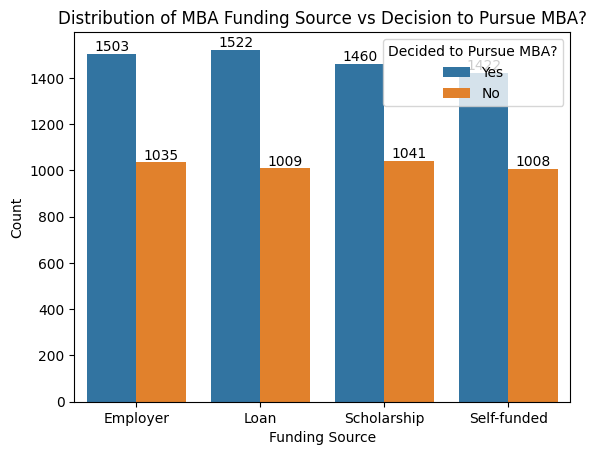

In [22]:
ax=sns.countplot(data=df, x='MBA Funding Source',hue='Decided to Pursue MBA?')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Distribution of MBA Funding Source vs Decision to Pursue MBA?')
plt.xlabel('Funding Source')
plt.ylabel('Count')
plt.show()

Loan and self-funding are the most common funding sources among those who decided to pursue an MBA.

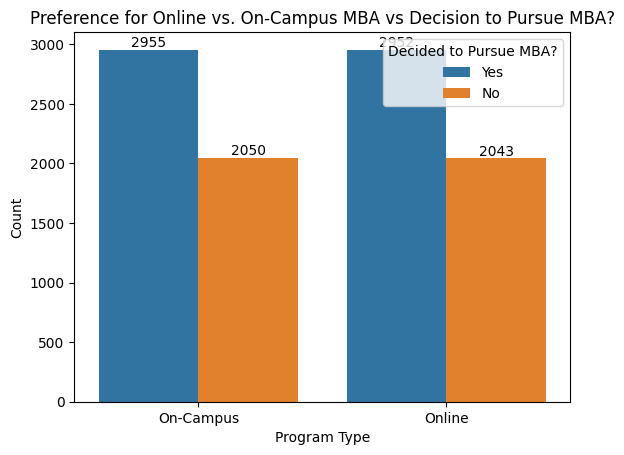

In [23]:
ax=sns.countplot(data=df, x='Online vs. On-Campus MBA',hue='Decided to Pursue MBA?')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Preference for Online vs. On-Campus MBA vs Decision to Pursue MBA?')
plt.xlabel('Program Type')
plt.ylabel('Count')
plt.show()

A significantly larger number of individuals prefer on-campus programs, regardless of whether they decide to pursue an MBA or not.

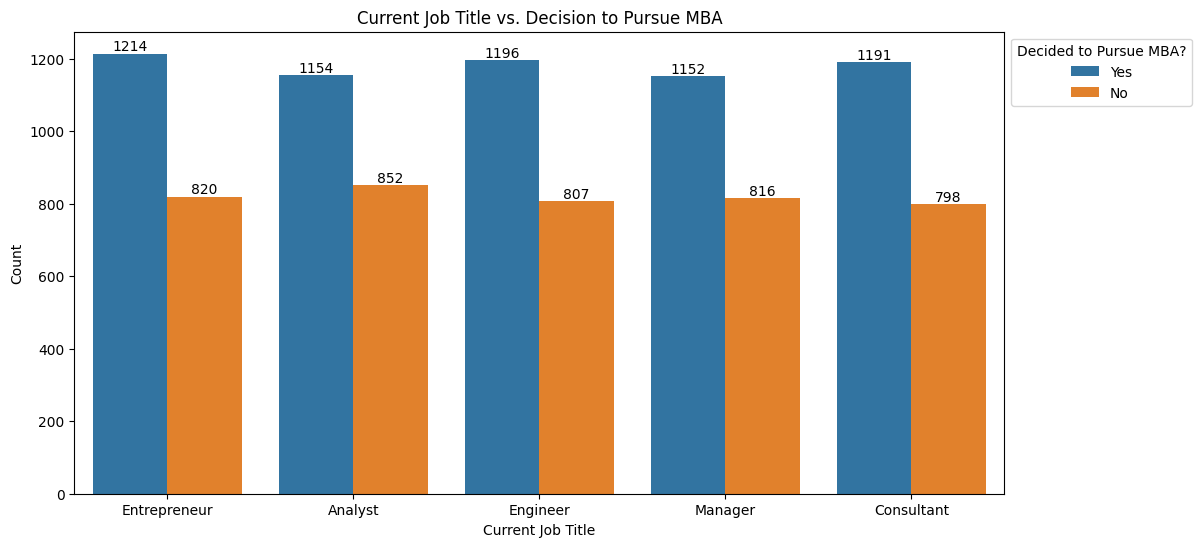

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Current Job Title', hue='Decided to Pursue MBA?')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Current Job Title vs. Decision to Pursue MBA')
plt.xlabel('Current Job Title')
plt.ylabel('Count')
plt.legend(title='Decided to Pursue MBA?', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Entrepreneur and Engineer show the highest interest in pursuing an MBA among the job titles shown.

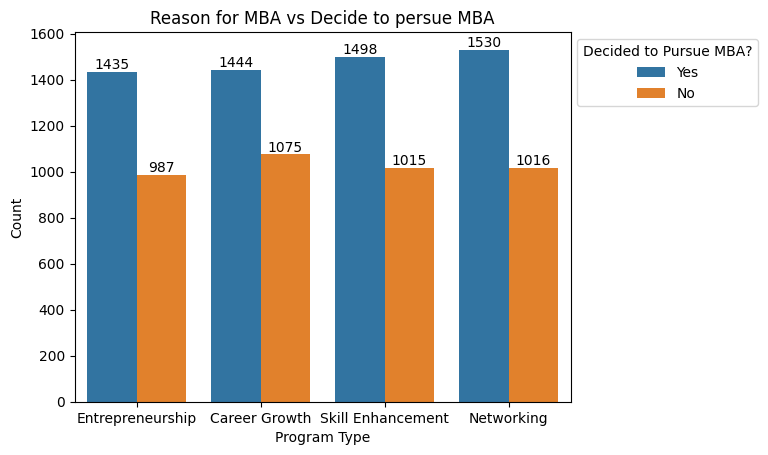

In [25]:
ax=sns.countplot(data=df, x='Reason for MBA',hue='Decided to Pursue MBA?')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Reason for MBA vs Decide to persue MBA')
plt.xlabel('Program Type')
plt.ylabel('Count')
plt.legend(title='Decided to Pursue MBA?', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Networking and skill enhancement are the top motivators for those pursuing an MBA, while entrepreneurship is less frequently cited.

**Conclusion**
Economics and Science majors, along with individuals with higher GPAs, are more likely to pursue an MBA, expecting a significant salary boost post-MBA. Most MBA aspirants are in the 25-34 age group, prefer on-campus programs, and often fund their education through loans or self-funding. Career growth, driven by networking and skill enhancement, is the primary motivation for pursuing an MBA.


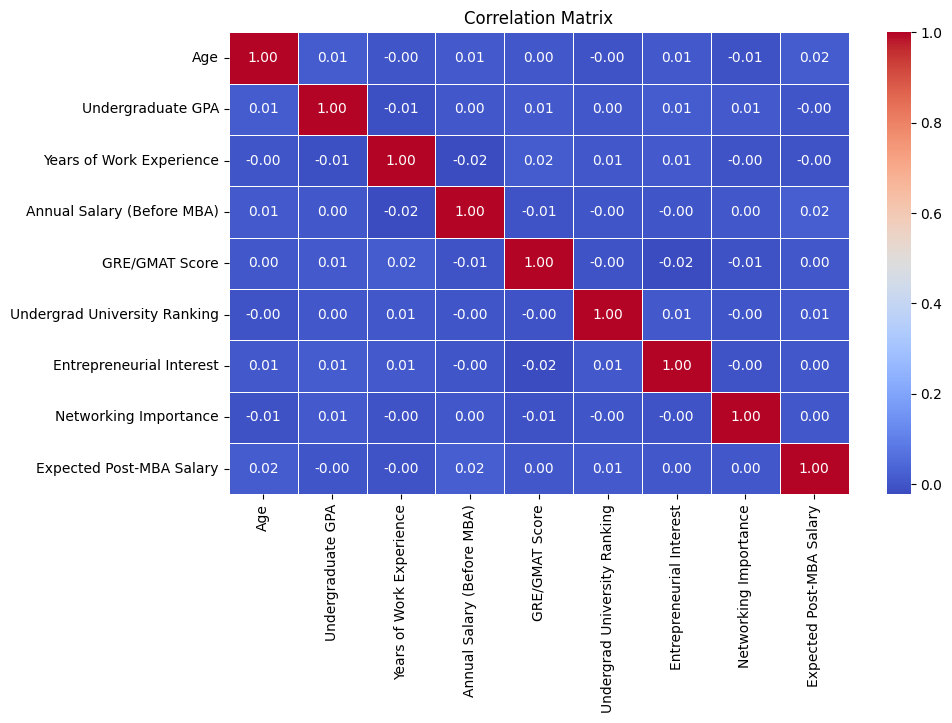

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


**Preprocessing**

In [27]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform data
encoded_data = encoder.fit_transform(df[['Gender','Undergraduate Major','Current Job Title','Has Management Experience','MBA Funding Source','Desired Post-MBA Role','Location Preference (Post-MBA)','Online vs. On-Campus MBA','Reason for MBA']])

# Create a DataFrame for the encoded data
df2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender','Undergraduate Major','Current Job Title','Has Management Experience','MBA Funding Source','Desired Post-MBA Role','Location Preference (Post-MBA)','Online vs. On-Campus MBA','Reason for MBA']))

# Concatenate original and encoded data
result = pd.concat([df, df2], axis=1)

(result)

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,...,Desired Post-MBA Role_Marketing Director,Desired Post-MBA Role_Startup Founder,Location Preference (Post-MBA)_Domestic,Location Preference (Post-MBA)_International,Online vs. On-Campus MBA_On-Campus,Online vs. On-Campus MBA_Online,Reason for MBA_Career Growth,Reason for MBA_Entrepreneurship,Reason for MBA_Networking,Reason for MBA_Skill Enhancement
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,33,Female,Economics,3.55,5,Analyst,109172,Yes,524,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9996,9997,30,Female,Business,2.48,5,Manager,82515,Yes,330,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9997,9998,31,Female,Economics,2.86,8,Manager,34152,Yes,681,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9998,9999,22,Female,Arts,2.30,1,Engineer,61897,No,481,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform data
df['Class_LabelEncoded'] = label_encoder.fit_transform(df['Decided to Pursue MBA?'])

(df)

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,...,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?,Age Group,Class_LabelEncoded
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,...,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes,25-29,1
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,...,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No,20-24,0
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,...,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No,30-34,0
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,...,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No,30-34,0
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,...,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes,25-29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,33,Female,Economics,3.55,5,Analyst,109172,Yes,524,...,8.0,Loan,Startup Founder,69000,International,Networking,Online,Yes,30-34,1
9996,9997,30,Female,Business,2.48,5,Manager,82515,Yes,330,...,8.5,Scholarship,Consultant,131054,Domestic,Entrepreneurship,On-Campus,No,30-34,0
9997,9998,31,Female,Economics,2.86,8,Manager,34152,Yes,681,...,8.8,Loan,Consultant,100806,Domestic,Networking,On-Campus,Yes,30-34,1
9998,9999,22,Female,Arts,2.30,1,Engineer,61897,No,481,...,7.7,Self-funded,Marketing Director,115872,International,Networking,Online,Yes,20-24,1


In [29]:
result = pd.get_dummies(df,dtype=int,drop_first=True)
result

,Age,Undergraduate GPA,Years of Work Experience,Annual Salary (Before MBA),GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,Expected Post-MBA Salary,Class_LabelEncoded,...,Desired Post-MBA Role_Startup Founder,Location Preference (Post-MBA)_International,Reason for MBA_Entrepreneurship,Reason for MBA_Networking,Reason for MBA_Skill Enhancement,Online vs. On-Campus MBA_Online,Decided to Pursue MBA?_Yes,Age Group_25-29,Age Group_30-34,Age Group_35+
0,27,3.18,8,90624,688,185,7.9,7.6,156165,1,...,0,1,1,0,0,0,1,1,0,0
1,24,3.03,4,53576,791,405,3.8,4.1,165612,0,...,1,1,0,0,0,1,0,0,0,0
2,33,3.66,9,79796,430,107,6.7,5.5,122248,0,...,0,0,0,0,1,1,0,0,1,0
3,31,2.46,1,105956,356,257,1.0,5.3,123797,0,...,0,1,1,0,0,0,0,0,1,0
4,28,2.75,9,96132,472,338,9.5,4.9,197509,1,...,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,3.55,5,109172,524,100,9.2,8.0,69000,1,...,1,1,0,1,0,1,1,0,1,0
9996,30,2.48,5,82515,330,362,7.4,8.5,131054,0,...,0,0,1,0,0,0,0,0,1,0
9997,31,2.86,8,34152,681,308,6.8,8.8,100806,1,...,0,0,0,1,0,0,1,0,1,0
9998,22,2.30,1,61897,481,190,5.7,7.7,115872,1,...,0,1,0,1,0,1,1,0,0,0


**Spliting data into train and test**

In [30]:
print(result.columns)

Index(['Age', 'Undergraduate GPA', 'Years of Work Experience',
       'Annual Salary (Before MBA)', 'GRE/GMAT Score',
       'Undergrad University Ranking', 'Entrepreneurial Interest',
       'Networking Importance', 'Expected Post-MBA Salary',
       'Class_LabelEncoded',
       ...
       'Desired Post-MBA Role_Startup Founder',
       'Location Preference (Post-MBA)_International',
       'Reason for MBA_Entrepreneurship', 'Reason for MBA_Networking',
       'Reason for MBA_Skill Enhancement', 'Online vs. On-Campus MBA_Online',
       'Decided to Pursue MBA?_Yes', 'Age Group_25-29', 'Age Group_30-34',
       'Age Group_35+'],
      dtype='object', length=10036)


In [31]:
X = result.drop('Decided to Pursue MBA?_Yes', axis=1)
Y = result['Decided to Pursue MBA?_Yes']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score

# Making predictions
y_pred = model.predict(x_test)

# Checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7435
